# Проект: Принятие решений в бизнесе

## Общая информация

### Описание исследования. 

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки крупного интернет-магазина. Приоритизировать гипотезы, запустить A/B-тест, проанализировать результаты. 

### Описание данных

#### Данные для первой части

Файл /datasets/hypothesis.csv.

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части

Файл /datasets/orders.csv.

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Импортируем необходимые библиотеки и загрузим данные из CSV-файлов в переменные

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
hypos = pd.read_csv('/datasets/hypothesis.csv', sep=',')  # файл с гипотезами
# данные A/B теста
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

## Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [3]:
# изучим файл с гипотезами
pd.set_option('display.max_colwidth', None)
for i in [hypos]:
    i.columns = i.columns.str.lower()  # переведем названия в нижний регистр, заменим пробелы на нижнее подчеркивание
hypos

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
hypos['ICE'] = hypos['impact'] * hypos['confidence'] / hypos['efforts']
pd.set_option('display.max_colwidth', None)
hypos[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективная гипотеза 8, затем идут гипотезы 0, 7, 6, 2

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
# Посчитаем RICE для гипотез
hypos['RICE'] = hypos['reach'] * hypos['impact'] * hypos['confidence'] / hypos['efforts']
pd.set_option('display.max_colwidth', None)
hypos[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Изменение приоритизации гипотез при применении RICE вместо ICE.

Наиболее перспективная гипотеза: 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) - её и будем тестировать первой. 

затем идут гипотезы:

2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, 

0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, 

6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. 

Восьмая гипотеза не набрала достаточна баллов.

Изменения в порядке связаны с количеством пользователей, которое затронет гипотеза. 

Парметр Reach у гипотезы 7 имеет максимальное значение 10, а у гипотезы 8 - минимальный 1, что и повлияло на изменение приоритета. 


## Подготовка к проведению A/B-теста

In [6]:
# посмотрим информацию о данных
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
print(orders.head(10))
print(visitors.head(10))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10     A       406


In [8]:
for i in [orders, visitors]:
    print(i.duplicated().sum()) # проверим есть ли в данных дубликаты


0
0


проверим пересечения пользователей в группах.

In [9]:
visitors_ab = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1')  # пересечение пользователей по группам
len(visitors_ab)

58

58 пересечений незначительное количество, на резульат теста не повлияет.

In [10]:
visitors[['group', 'visitors']].groupby('group').sum()  # количество пользователей в группах

,visitors
group,
A,18736
B,18916


Разница в группах не превышает 1 %

## Часть 2. Анализ A/B-теста

Проанализируем A/B-тест:

### Построим график кумулятивной выручки по группам. 

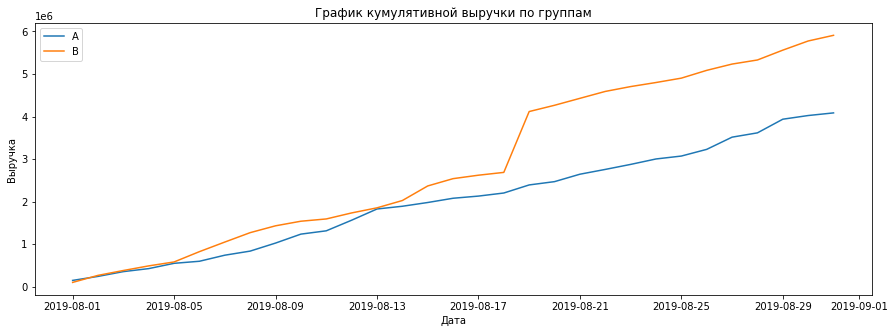

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # Тип данных в столбцах date - object, 

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # поменяем на формат для работы с датой

datesGroups = orders[['date', 'group']].drop_duplicates()  # создаем массив уникальных пар значений дат и групп теста
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(         
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=0)

plt.legend() 
plt.show()

На протяжении почти всего наблюдения группа В превосходит группу А. Резкий рост значений в группе B после середины теста говорит о наличии аномальных значений.

### Построим график кумулятивного среднего чека по группам. 

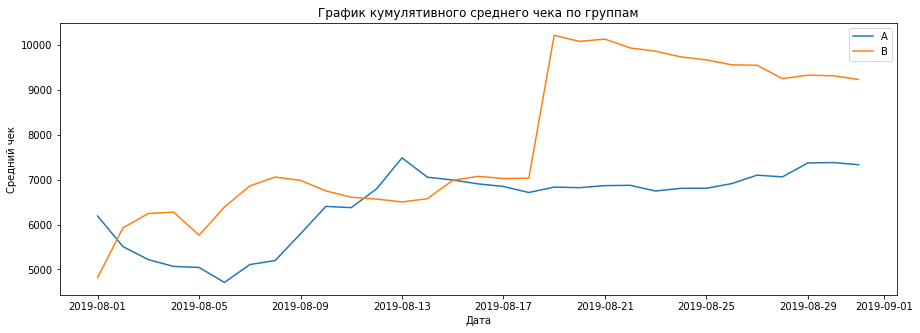

In [12]:
plt.figure(figsize=(15,5))
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=0)
plt.legend()
plt.show()

В группе А среднее значение приближается к 7000. в гуппе В есть сильные всплески. Вероятно требуется дополнительный анализ аномальных значений, возможно, в середине теста в группу B попали крупные заказы.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

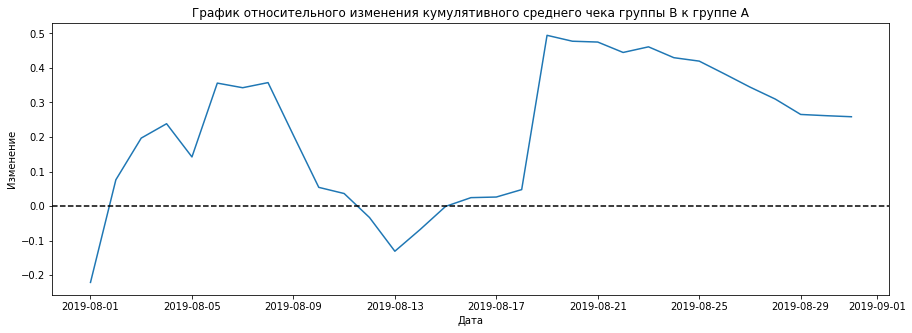

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение')
plt.xlabel('Дата')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=0)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Вероятно в этих точках крупные заказы и выбросы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 

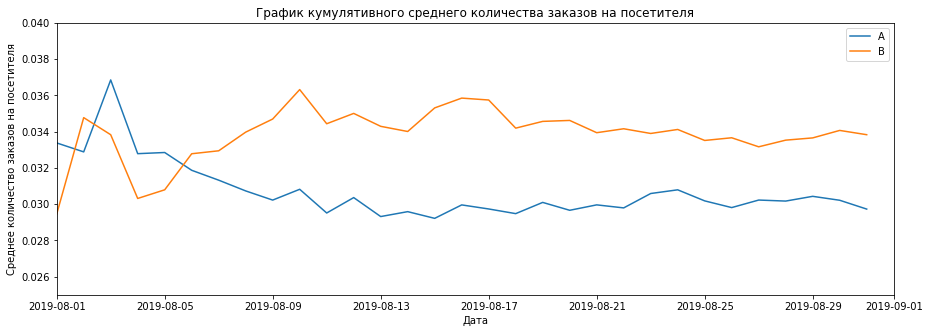

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=0)
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-09-01', 0.025, 0.04])
plt.show()

Абсолютные значения колебаний не очень большие, в пределах 1%. После колебаний в начале теста начения группы В установились выше значений группы А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

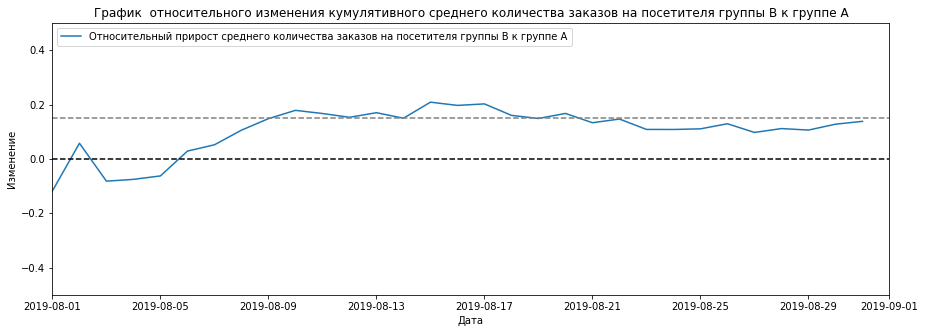

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.title('График  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Изменение')
plt.xlabel('Дата')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B к группе A")
#plt.legend(bbox_to_anchor=( 0.62 , 0.05 ), loc='upper left', borderaxespad= -20)
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]) 
plt.show()

Сначала группа В уступала группе А. Затем вырвалась вперед и завиксирваласт выше А окола 20%.

### Построим точечный график количества заказов по пользователям.

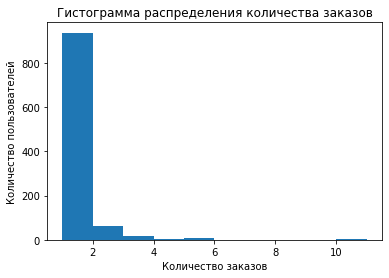

In [16]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
plt.title('Гистограмма распределения количества заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.hist(ordersByUsers['orders']) 
plt.show()

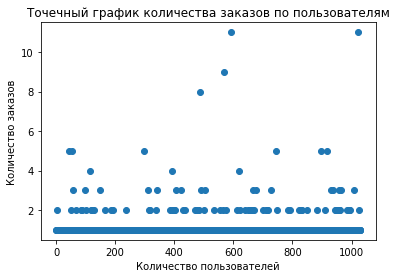

In [17]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Большинство пользователей совершили 1 заказ. Аномальное количество заказов больше 5.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей сделали больше 2-х заказов и не более 1% больше 4-х. Выберем за границу для определения аномальных пользователей больше 4 заказов.

### Построим точечный график стоимостей заказов. 

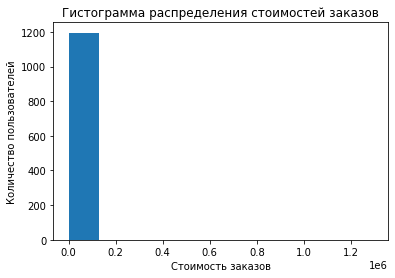

In [19]:
plt.hist(orders['revenue'])
plt.title('Гистограмма распределения стоимостей заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Стоимость заказов')
plt.show()

Стоимость большинства заказов меньше 100000. Однако сложно сделать выводы о более дорогих заказах, кроме того, что они есть.

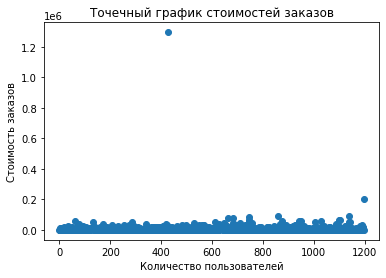

In [20]:
y_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(y_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.show()

Заказ больше 1200000 выглядит аномально. Есть выброс около 200000.

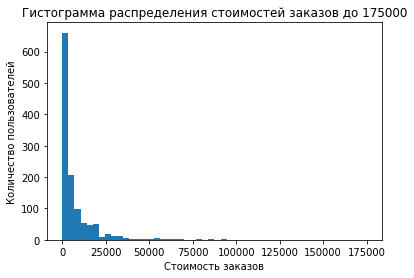

In [21]:
plt.hist(orders['revenue'], bins=50, range=(0, 175000))
plt.title('Гистограмма распределения стоимостей заказов до 175000')
plt.ylabel('Количество пользователей')
plt.xlabel('Стоимость заказов')
plt.show()

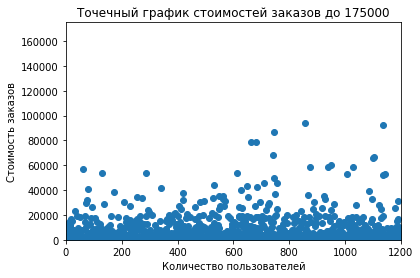

In [22]:
y_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(y_values, orders['revenue']) 
plt.axis([0, 1200, 0, 175000])
plt.title('Точечный график стоимостей заказов до 175000')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.show()

Основная часть заказов до 20000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [23]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов больше 28000 и не более 1% заказов более 58233,2. Возможно отсеить аномальные заказы дороже 28000.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы. 

Нулевая: статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. 

Альтернативная: статистически значимые различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

In [24]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value - {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительные различия - {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              20           148579              21   
1 2019-08-02              19            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              15            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  20               148579   
1           165531                  39               242401   
2           114248                  63               354874   
3           108571                  78               425699   
4            92428                 103               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Вывод: По «сырым» данным различий в среднем числе заказов групп A и B нет. 
p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 13.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем гипотезы. 

Нулевая: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет. 

Альтернативная: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть.

In [25]:
print('P-value - {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия - {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value - 0.729
Относительные различия - 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различие среднего чека между группами 26%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])


1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
59


Всего 59 аномальных пользователей.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сформулируем гипотезы. 

Нулевая: статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет. 

Альтернативная: статистически значимые различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value - {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные изменения - {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value - 0.018
Относительные изменения - 0.145


Статистическая значимость достигнута. Группа В лучше группы А.

Вывод: По «очищенным» данным различий в среднем числе заказов групп A и B нет. p-value = 0.018 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 14.5%.

### Посчитайтем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

<Сформулируем гипотезы. 

Нулевая: статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. 

Альтернативная: статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [28]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительные изменения: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.961
Относительные изменения: -0.014


P-value увеличился, разница между группами поменялась в обратную сторону. группа В стала хуже на 1.4%.

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различие среднего чека между группами 26%.

### Решение по результатам теста

Среднее количество заказов увеличилось в группе В на 14,5 %. Статистически значимого различия по среднему чеку между группами нет, средний чек уменьшился на 1,4 %.

После удаления аномалий изменилось значение среднего чека.

По результатам теста можно зафиксировать робеду группы В по количеству заказов и отсутствие различий по среднему чеку.